In [1]:
#example 
import pandas as pd
import os

In [2]:
from phase_extender.hapstats import plot_stacked_haplotypes_variants, get_melted_df, plot_hist_one_chr_stacked, get_merged_metrices

In [3]:
def merge_stats_files(initial_df_path, final_df_path, outputdir=None,filename= 'merged_stats.tsv', return_df= False):
    if outputdir is None:
        outputdir = os.getcwd()
    os.makedirs(outputdir, exist_ok=True)    

    initial_hap_df = pd.read_csv(initial_df_path, sep='\t')
    final_hap_df = pd.read_csv(final_df_path, sep='\t', )
    concat_df = pd.concat([initial_hap_df, final_hap_df], ignore_index=True)
    concat_df["stage"] = ["initial", "final"]
    outpath = outputdir + filename
    concat_df.to_csv(outpath, index=False, sep='\t')
    print("Merged successfully")
    if return_df:
        return concat_df

# For Set A

## For first iteration

In [5]:
initial_df_path = '../../data/SetA/phased_NA12891_SetA_run01/initial_haplotype_stats_NA12891.txt'
final_df_path = "../../data/SetA/phased_NA12891_SetA_run01/final_haplotype_stats_NA12891.txt"
outputdir='../../data/plots/NA12891/setA/'

soi= 'NA12891'

In [8]:
iter1_df = merge_stats_files(initial_df_path, final_df_path, outputdir,filename="iter1stats.csv", return_df=True)
iter1_df

Merged successfully


,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,18.0,20.0,21.0,22.0...","17,15,19,4,19,6,7,5,5,27,22,5,51,8,5,34,5,4,14...","83618,40234,56755,57384,147745,25885,26293,271...",391,9666,final


## For second iteration

In [9]:
# For second iteration
initial_df_path2 = '../../data/SetA_02/phased_NA12891_SetA_run02/initial_haplotype_stats_NA12891.txt'
final_df_path2 = "../../data/SetA_02/phased_NA12891_SetA_run02/final_haplotype_stats_NA12891.txt"

soi= 'NA12891'

In [10]:
iter2_df = merge_stats_files(initial_df_path2, final_df_path2, outputdir,filename="seta_iter2_stats.tsv", return_df=True)
iter2_df

Merged successfully


,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,5.0,9.0,12.0,13.0,17.0,18.0,20.0,21.0,22.0...","17,15,19,4,19,6,7,5,5,27,22,5,51,8,5,34,5,4,14...","83618,40234,56755,57384,147745,25885,26293,271...",391,9666,initial
1,20,"1.0,54.0,90.0,216.0,250.0,361.0,368.0,369.0,37...","254,195,612,164,541,34,4,4,5,879,240,590,636,3...","1172098,711912,3244413,656419,3413648,76875,70...",67,9666,final


## Now merged stats from two iteration to reproduce results.

In [11]:
merged = pd.concat([iter1_df, iter2_df], ignore_index=True)
merged['stage'] = ['initial', 'iteration01','iteration01', 'iteration02']
merged= merged.drop_duplicates()
merged

,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,18.0,20.0,21.0,22.0...","17,15,19,4,19,6,7,5,5,27,22,5,51,8,5,34,5,4,14...","83618,40234,56755,57384,147745,25885,26293,271...",391,9666,iteration01
3,20,"1.0,54.0,90.0,216.0,250.0,361.0,368.0,369.0,37...","254,195,612,164,541,34,4,4,5,879,240,590,636,3...","1172098,711912,3244413,656419,3413648,76875,70...",67,9666,iteration02


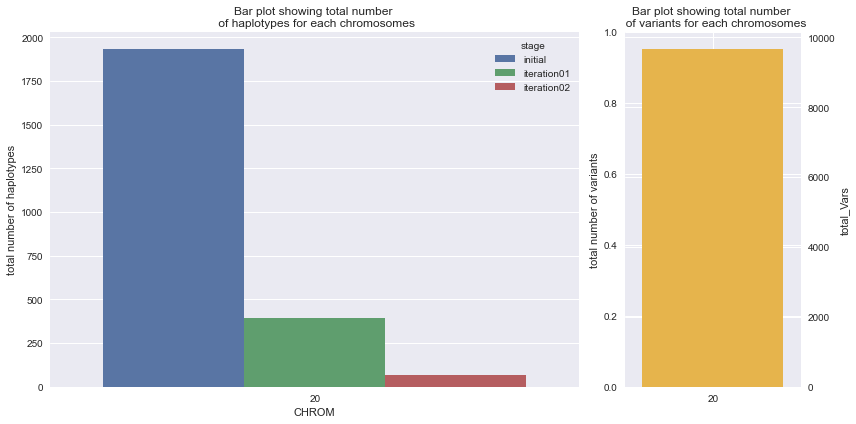

In [47]:
plot_stacked_haplotypes_variants(merged, outputdir)

In [49]:
genomic_dist = get_melted_df(merged, col_name= 'range_of_PI')

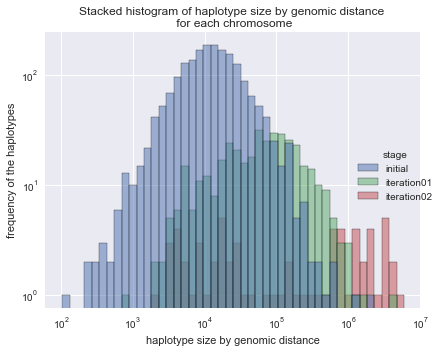

In [52]:
filepath = outputdir + 'seta_stacked_historgram_genomic_dist.png'
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI",show_plot=True, logscale_y=10, logscale_x=10, filepath=filepath)

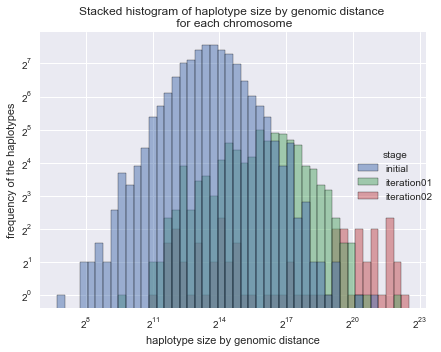

In [30]:
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI",show_plot=True, logscale_y=2, logscale_x=2)

In [53]:
num_vars = get_melted_df(merged, col_name = "num_Vars_by_PI")

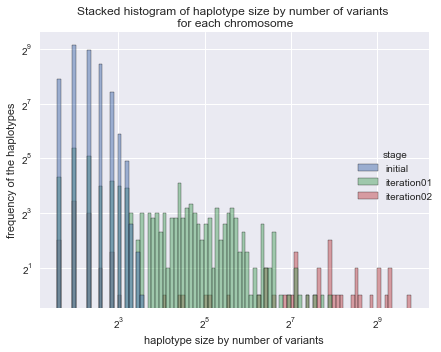

In [55]:
filepath = outputdir + 'seta_stacked_historgram_by_var_size.png'

plot_hist_one_chr_stacked(num_vars,hist_by= "num_Vars_by_PI",logscale_y=2, logscale_x=2, show_plot=True, filepath=filepath)


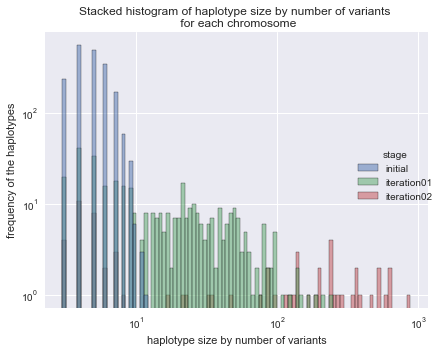

In [56]:
plot_hist_one_chr_stacked(num_vars,hist_by= "num_Vars_by_PI",logscale_y=10, logscale_x=10, show_plot=True)


In [13]:
get_merged_metrices(merged,outputdir)


# For Set B

In [58]:
## For first iteration
initial_df_path = '../../data/SetB/phased_NA12891_SetB_run01/initial_haplotype_stats_NA12891.txt'
final_df_path = "../../data/SetB/phased_NA12891_SetB_run01/final_haplotype_stats_NA12891.txt"
outputdir='../../data/plots/NA12891/SetB/'


In [61]:

soi= 'NA12891'
iter1_df = merge_stats_files(initial_df_path, final_df_path, outputdir,filename="setb_iter1_stats.tsv", return_df=True)
iter1_df


Merged successfully


,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,20.0,21.0,22.0,24.0...","17,15,19,4,19,13,5,5,14,7,6,6,4,17,22,5,61,15,...","83618,40234,56755,57384,147745,83182,27164,476...",207,9666,final


In [62]:
## For second iteration
# For second iteration
initial_df_path2 = '../../data/SetB_02/phased_NA12891_SetB_run02/initial_haplotype_stats_NA12891.txt'
final_df_path2 = "../../data/SetB_02/phased_NA12891_SetB_run02/final_haplotype_stats_NA12891.txt"


In [63]:

soi= 'NA12891'
iter2_df = merge_stats_files(initial_df_path2, final_df_path2, outputdir,filename="setb_iter2_stats.tsv", return_df=True)
iter2_df


Merged successfully


,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,5.0,9.0,12.0,13.0,17.0,20.0,21.0,22.0,24.0...","17,15,19,4,19,13,5,5,14,7,6,6,4,17,22,5,61,15,...","83618,40234,56755,57384,147745,83182,27164,476...",207,9666,initial
1,20,"1.0,689.0,744.0,1384.0","3386,284,3194,2802","17386824,1949133,26087506,16659184",4,9666,final


In [64]:

## Now merged stats from two iteration to reproduce results.
merged = pd.concat([iter1_df, iter2_df], ignore_index=True)
merged['stage'] = ['initial', 'iteration01', 'iteration01',  'iteration02']
merged= merged.drop_duplicates()
merged

,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,20.0,21.0,22.0,24.0...","17,15,19,4,19,13,5,5,14,7,6,6,4,17,22,5,61,15,...","83618,40234,56755,57384,147745,83182,27164,476...",207,9666,iteration01
3,20,"1.0,689.0,744.0,1384.0","3386,284,3194,2802","17386824,1949133,26087506,16659184",4,9666,iteration02


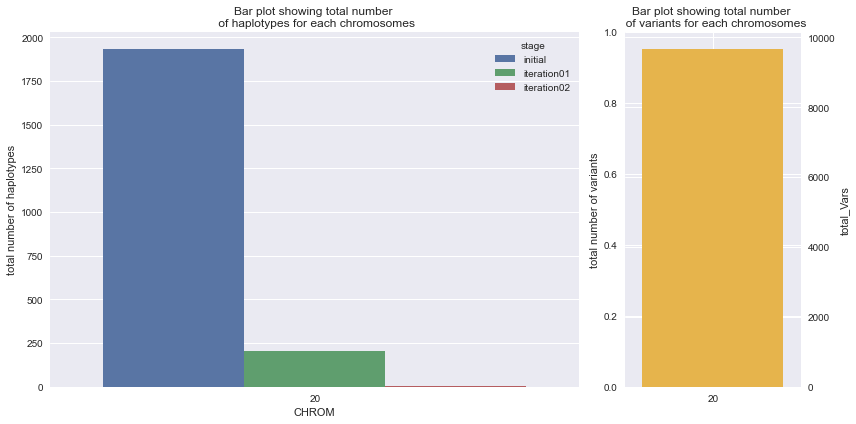

In [66]:
 
plot_stacked_haplotypes_variants(merged,outputdir )


In [67]:
genomic_dist = get_melted_df(merged, col_name= 'range_of_PI')


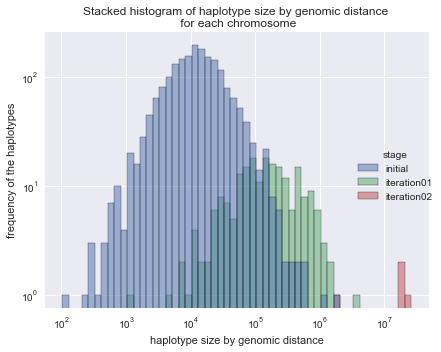

In [74]:
filepath = outputdir + '/setb_stacked_historgram_genomic_dist.png'
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI",show_plot=True, logscale_y=10, logscale_x=10, filepath=filepath)

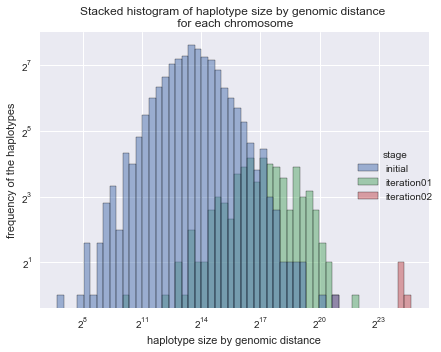

In [69]:
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI",show_plot=True, logscale_y=2, logscale_x=2)


In [70]:
num_vars = get_melted_df(merged, col_name = "num_Vars_by_PI")


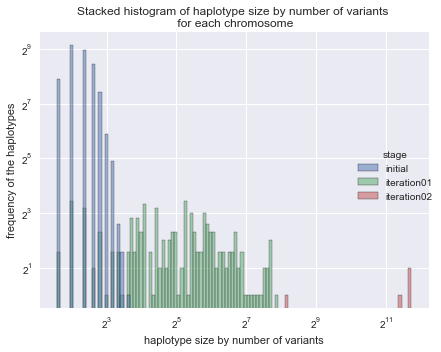

In [71]:
plot_hist_one_chr_stacked(num_vars,hist_by= "num_Vars_by_PI",logscale_y=2, logscale_x=2, show_plot=True)


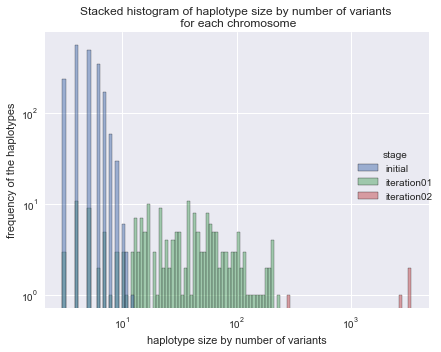

In [75]:
filepath = outputdir + '/setb_stacked_histogram_vars_size.png'

plot_hist_one_chr_stacked(num_vars,hist_by= "num_Vars_by_PI",logscale_y=10, logscale_x=10, show_plot=True, filepath=filepath)


In [77]:

get_merged_metrices(merged)


,CHROM,max_range_pi,min_range_pi,max_num_vars_pi,min_num_vars_pi,stage
0,20,2057927,104,12,3,initial
1,20,3442116,1290,232,3,iteration01
3,20,26087506,1949133,3386,284,iteration02
